### Regularization Methods Example 5.2

In example 4.1 we saw that **lstat** and **rm** are by far the most important variables. We can also produce partial dependence plots for these two variables. 

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

# Load data
df = pd.read_csv('./data/Boston.csv', index_col=0)

# Define target and predictors
x = df.drop(columns='medv') 
y = df['medv']

# Split in test and train set
np.random.seed(1)
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.5)

# Fit model:
reg = GradientBoostingRegressor(n_estimators=5000, max_depth=4, 
                                learning_rate=0.001)
reg = reg.fit(x_train, y_train)

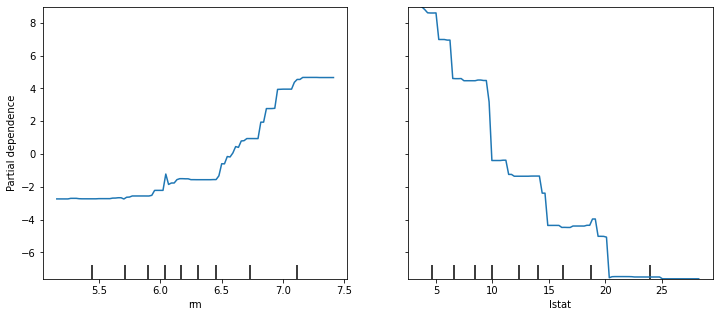

In [9]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import plot_partial_dependence
import matplotlib.pyplot as plt
import pandas as pd

# Plotting partial dependence
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 1, 1)
plot_partial_dependence(reg, x_train, ['rm', 'lstat'], ax=ax, kind='average') 
plt.show()

These partial dependence plots illustrate the marginal effect of the selected variables on the response after integrating out the other variables. In this case, as we might expect, median house prices are increasing with **rm** and decreasing with **lstat**.